##### use pandas to read html table
- for line plot: https://en.wikipedia.org/wiki/Sweden_at_the_Olympics
- for bar chart: https://en.wikipedia.org/wiki/2024_Summer_Olympics_medal_table

In [22]:
#read html data
import pandas as pd

url = "https://en.wikipedia.org/wiki/Sweden_at_the_Olympics"
df_year = pd.read_html(url)[2]
df_year = df_year[:-3] #use slicing to remove rows for future events and total counts

In [23]:
df_year

,Games,Athletes,Gold,Silver,Bronze,Total,Rank
0,1896 Athens,1,0,0,0,0,–
1,1900 Paris,10,0,0,1,1,20
2,1904 St. Louis,did not participate,did not participate,did not participate,did not participate,did not participate,did not participate
3,1908 London,168,8,6,11,25,3
4,1912 Stockholm,444,23,25,17,65,2
5,1920 Antwerp,260,19,20,25,64,2
6,1924 Paris,159,4,13,12,29,8
7,1928 Amsterdam,100,7,6,12,25,4
8,1932 Los Angeles,81,9,5,9,23,4
9,1936 Berlin,171,6,5,9,20,7


In [8]:
type(df_year)

pandas.core.frame.DataFrame

##### create year column

In [ ]:
#by slicing of first four characters
#alternatively, use string method with regular expression, replace()
df_year["Year"] = df_year["Games"].str[:4]

#transform column type from object to int
df_year["Year"] = df_year["Year"].astype(int)
df_year.head()

,Games,Athletes,Gold,Silver,Bronze,Total,Rank,Year
0,1896 Athens,1,0,0,0,0,–,1896
1,1900 Paris,10,0,0,1,1,20,1900
2,1904 St. Louis,did not participate,did not participate,did not participate,did not participate,did not participate,did not participate,1904
3,1908 London,168,8,6,11,25,3,1908
4,1912 Stockholm,444,23,25,17,65,2,1912


##### clean total column
- we decide to fill zero for the year with no information of medals, i.e. 1904
- beaware that this decision will affect how the graph looks like

In [ ]:
#check no. of strange value
df_year["Total"].value_counts()

Total
12                     3
11                     3
8                      3
19                     2
25                     2
5                      2
did not participate    1
1                      1
0                      1
65                     1
64                     1
23                     1
29                     1
6                      1
35                     1
44                     1
20                     1
16                     1
4                      1
7                      1
9                      1
Name: count, dtype: int64

In [ ]:
df_year["Total"][df_year["Total"]=="did not participate"] = 0

/var/folders/wx/w9rjl8097253hjvtyhbf7qjc0000gn/T/ipykernel_1376/1312961724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["Total"][df_year["Total"]=="did not participate"] = 0


In [32]:
#transforming the column to numeric columns
#before doing so, we see that there is "0" and 0 in different rows
df_year["Total"] = df_year["Total"].astype(int)
df_year["Total"].value_counts()

Total
11    3
8     3
12    3
0     2
5     2
19    2
25    2
1     1
65    1
64    1
23    1
29    1
6     1
35    1
44    1
20    1
16    1
4     1
7     1
9     1
Name: count, dtype: int64

##### plot with pandas plot() method of dataframe
- this uses matplotlib at the background
- remove clutter, example spines, legend etc 

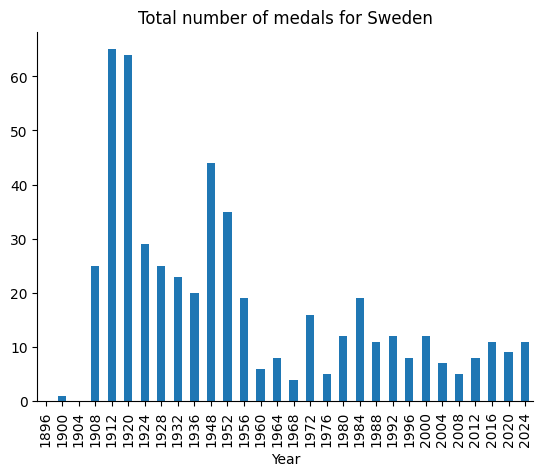

In [43]:
year_plot = df_year.plot(x = "Year",
             y = "Total",
             title = "Total number of medals for Sweden",
             kind = "bar"); #use semicolon to supress text info, which is written out by dunder __repr__ method

year_plot.spines["top"].set_visible(False)
year_plot.spines["right"].set_visible(False)
year_plot.legend().set_visible(False)

In [ ]:
#compare print(df object) and only write down df object
#the different outputs are due to dunder __str__ and dunder __repre__ methods in dataframe class
print(df_year)

                  Games             Athletes                 Gold  \
0           1896 Athens                    1                    0   
1            1900 Paris                   10                    0   
2        1904 St. Louis  did not participate  did not participate   
3           1908 London                  168                    8   
4        1912 Stockholm                  444                   23   
5          1920 Antwerp                  260                   19   
6            1924 Paris                  159                    4   
7        1928 Amsterdam                  100                    7   
8      1932 Los Angeles                   81                    9   
9           1936 Berlin                  171                    6   
10          1948 London                  181                   16   
11        1952 Helsinki                  206                   12   
12       1956 Melbourne                   97                    8   
13            1960 Rome           

In [36]:
df_year

,Games,Athletes,Gold,Silver,Bronze,Total,Rank,Year
0,1896 Athens,1,0,0,0,0,–,1896
1,1900 Paris,10,0,0,1,1,20,1900
2,1904 St. Louis,did not participate,did not participate,did not participate,did not participate,0,did not participate,1904
3,1908 London,168,8,6,11,25,3,1908
4,1912 Stockholm,444,23,25,17,65,2,1912
5,1920 Antwerp,260,19,20,25,64,2,1920
6,1924 Paris,159,4,13,12,29,8,1924
7,1928 Amsterdam,100,7,6,12,25,4,1928
8,1932 Los Angeles,81,9,5,9,23,4,1932
9,1936 Berlin,171,6,5,9,20,7,1936


##### keep top data points or limited timeframe

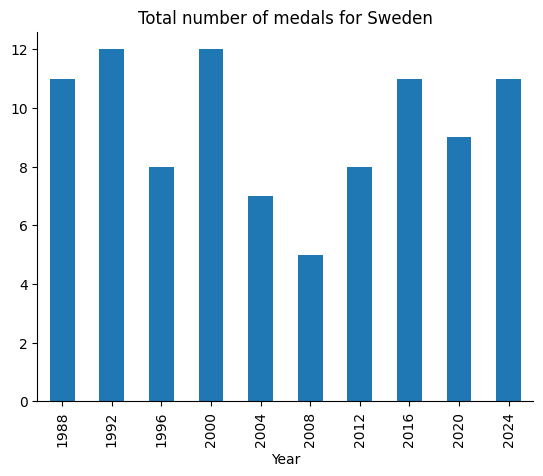

In [45]:
year_plot = df_year[-10:].plot(x = "Year",
             y = "Total",
             title = "Total number of medals for Sweden",
             kind = "bar"); #use semicolon to supress text info, which is written out by dunder __repr__ method

year_plot.spines["top"].set_visible(False)
year_plot.spines["right"].set_visible(False)
year_plot.legend().set_visible(False)